In [ ]:
#Project: Absa Corporate Client Forecast
#Date Opened: 01 November 2022
#Deadline: 27 November 2022
#Models Notebook

# Dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

# machine learning
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.cluster import KMeans
import xgboost as xgb
import optuna
from optuna.samplers import TPESampler
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
import time

#Filing 
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uploading files to the notebook.
from google.colab import files
uploaded = files.upload()

In [ ]:
pip install scikit-lego

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.8 MB/s 
     |████████████████████████████████| 209 kB 49.7 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 112 kB 59.0 MB/s 
     |████████████████████████████████| 147 kB 52.9 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=67e7b28a922cf557f666a4491ceaf322ea8a89884d4af65207aac9c132f59a68
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
data = pd.read_csv("train_final.csv")
data = data.sample(frac = 1)
X_train,X_test,y_train,y_test=train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],test_size=0.2,
    random_state=123)



In [ ]:
df = pd.read_csv("train_aux.csv")
df.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period,target
0,4323,1155,18,3,19,4,7,8,Morning,0
1,3890,200,18,3,18,3,7,27,Morning,0
2,5004,1604,63,3,24,2,2,28,Midnight,1
3,3040,853,15,3,19,4,12,2,Noon,1
4,5177,201,18,3,21,6,9,37,Morning,1


In [ ]:
test = pd.read_csv("test_final.csv")
test.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
0,2910,810,18,9,24,2,18,0,0,0,1,0
1,2910,810,18,9,24,2,12,0,0,0,0,1
2,2910,810,18,9,24,2,6,0,0,1,0,0
3,2910,810,18,9,24,2,0,0,1,0,0,0
4,2784,201,18,3,24,2,12,0,0,0,0,1


In [ ]:
test_aux = pd.read_csv("test_aux.csv")
test_aux.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,2910,810,18,9,24,2,18,0,Night
1,2910,810,18,9,24,2,12,0,Noon
2,2910,810,18,9,24,2,6,0,Morning
3,2910,810,18,9,24,2,0,0,Midnight
4,2784,201,18,3,24,2,12,0,Noon


In [ ]:
X_train.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
10922,2042,2531,18,9,5,4,17,41,0,0,0,1
906307,4705,925,18,4,3,2,15,56,0,0,0,1
396688,5449,451,18,3,14,6,10,45,0,1,0,0
547281,609,1855,18,9,7,6,5,40,1,0,0,0
876559,5842,1233,18,2,10,2,12,56,0,0,0,1


In [ ]:
X_test.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
451215,4452,971,18,2,21,6,7,14,0,1,0,0
260903,5918,1864,18,9,11,3,6,33,0,1,0,0
234405,1401,1233,18,3,13,5,7,59,0,1,0,0
491195,4782,2330,18,3,27,5,9,43,0,1,0,0
101530,6180,2460,18,9,19,4,7,11,0,1,0,0


In [ ]:
y_train.head()

10922     0
906307    1
396688    1
547281    0
876559    0
Name: target, dtype: int64

In [ ]:
y_test.head()

451215    0
260903    0
234405    0
491195    1
101530    0
Name: target, dtype: int64

In [ ]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.
    
    Parameters: 
        y_test - A numpy array 
        y_pred - A numpy array
        
    Return:
        NoneType
    """
    
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()

In [ ]:
refined_xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.61
Accuracy of XGB classifier on test set: 0.61


In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

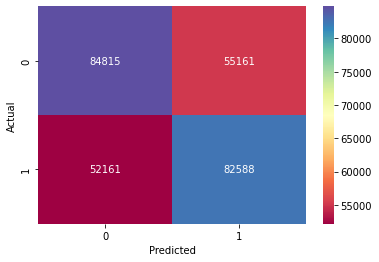

In [ ]:
get_confusion_matrix(np.array(y_test), ref_xgb_pred_y)

In [ ]:
print(classification_report(y_test,ref_xgb_pred_y))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61    139976
           1       0.60      0.61      0.61    134749

    accuracy                           0.61    274725
   macro avg       0.61      0.61      0.61    274725
weighted avg       0.61      0.61      0.61    274725



In [ ]:
log_reg_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
log_reg_pred_y = log_reg_model.predict(X_test)

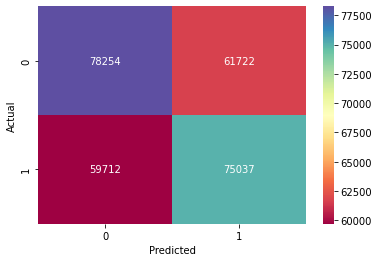

In [ ]:
get_confusion_matrix(np.array(y_test), log_reg_pred_y )

In [ ]:
print(classification_report(y_test,log_reg_pred_y))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56    139976
           1       0.55      0.56      0.55    134749

    accuracy                           0.56    274725
   macro avg       0.56      0.56      0.56    274725
weighted avg       0.56      0.56      0.56    274725



In [ ]:
rf = RandomForestClassifier(n_estimators = 413,
                            max_depth = 15,
                            min_samples_split = 15,
                            min_samples_leaf = 21,
                            max_features = "log2"
                            ).fit(X_train, y_train)

In [ ]:
rf_pred_y = rf.predict(X_test)

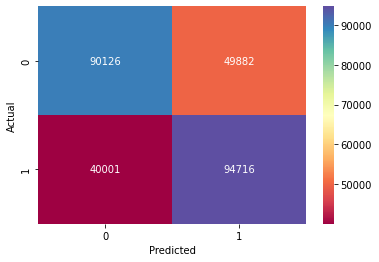

In [ ]:
get_confusion_matrix(np.array(y_test), rf_pred_y )

In [ ]:
print(classification_report(y_test,rf_pred_y))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67    140008
           1       0.66      0.70      0.68    134717

    accuracy                           0.67    274725
   macro avg       0.67      0.67      0.67    274725
weighted avg       0.67      0.67      0.67    274725



In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
knn_pred_y = knn.predict(X_test)

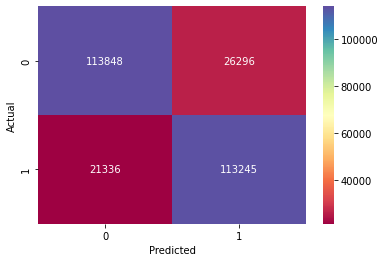

In [ ]:
get_confusion_matrix(np.array(y_test),knn_pred_y)

In [ ]:
print(classification_report(y_test,knn_pred_y))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83    140144
           1       0.81      0.84      0.83    134581

    accuracy                           0.83    274725
   macro avg       0.83      0.83      0.83    274725
weighted avg       0.83      0.83      0.83    274725



In [ ]:
trees = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
tree_pred_y = trees.predict(X_test)

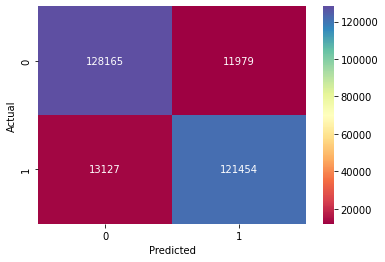

In [ ]:
get_confusion_matrix(np.array(y_test),tree_pred_y)

In [ ]:
print(classification_report(y_test,tree_pred_y))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    140144
           1       0.91      0.90      0.91    134581

    accuracy                           0.91    274725
   macro avg       0.91      0.91      0.91    274725
weighted avg       0.91      0.91      0.91    274725



In [ ]:
estimator = []

In [ ]:
estimator.append(('LR', LogisticRegression()))
estimator.append(('RND', RandomForestClassifier(n_estimators = 413,
                            max_depth = 15,
                            min_samples_split = 15,
                            min_samples_leaf = 21,
                            max_features = "log2"
                            )))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('XGB', xgb.XGBClassifier()))
estimator.append(('KNN', KNeighborsClassifier()))

In [ ]:
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

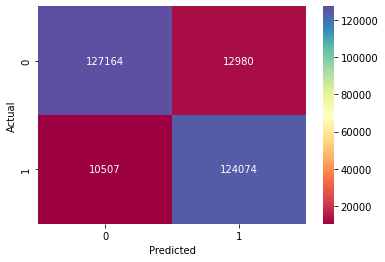

In [ ]:
get_confusion_matrix(np.array(y_test),y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    140144
           1       0.91      0.92      0.91    134581

    accuracy                           0.91    274725
   macro avg       0.91      0.91      0.91    274725
weighted avg       0.91      0.91      0.91    274725



In [ ]:
df.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period,target
0,4323,1155,18,3,19,4,7,8,Morning,0
1,3890,200,18,3,18,3,7,27,Morning,0
2,5004,1604,63,3,24,2,2,28,Midnight,1
3,3040,853,15,3,19,4,12,2,Noon,1
4,5177,201,18,3,21,6,9,37,Morning,1


In [ ]:
test_aux.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,2910,810,18,9,24,2,18,0,Night
1,2910,810,18,9,24,2,12,0,Noon
2,2910,810,18,9,24,2,6,0,Morning
3,2910,810,18,9,24,2,0,0,Midnight
4,2784,201,18,3,24,2,12,0,Noon


In [ ]:
scale_mapper = {"Midnight":1, "Morning":2, "Noon":3,"Night":4}
df["Period"] = df["Period"].replace(scale_mapper)
df.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period,target
0,4323,1155,18,3,19,4,7,8,2,0
1,3890,200,18,3,18,3,7,27,2,0
2,5004,1604,63,3,24,2,2,28,1,1
3,3040,853,15,3,19,4,12,2,3,1
4,5177,201,18,3,21,6,9,37,2,1


In [ ]:
scale_mapper = {"Midnight":1, "Morning":2, "Noon":3,"Night":4}
test_aux["Period"] = test_aux["Period"].replace(scale_mapper)
test_aux.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,2910,810,18,9,24,2,18,0,4
1,2910,810,18,9,24,2,12,0,3
2,2910,810,18,9,24,2,6,0,2
3,2910,810,18,9,24,2,0,0,1
4,2784,201,18,3,24,2,12,0,3


In [ ]:
df = df.sample(frac = 1)
X_train1,X_test1,y_train1,y_test1=train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],test_size=0.2,
    random_state=123)

In [ ]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(RandomForestClassifier(n_estimators = 413,
                            max_depth = 15,
                            min_samples_split = 15,
                            min_samples_leaf = 21,
                            max_features = "log2"
                            ), groups=["Period"])
mod.fit(X_train1,y_train1)

GroupedPredictor(estimator=RandomForestClassifier(max_depth=15,
                                                  max_features='log2',
                                                  min_samples_leaf=21,
                                                  min_samples_split=15,
                                                  n_estimators=413),
                 groups=['Period'])

In [ ]:
y_pred_grp = mod.predict(X_test1)

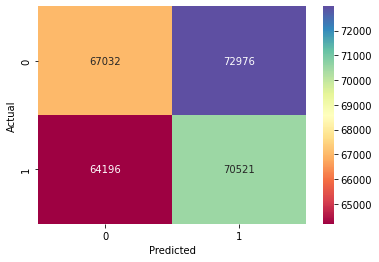

In [ ]:
get_confusion_matrix(np.array(y_test),y_pred_grp)

In [ ]:
print(classification_report(y_test1,y_pred_grp))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71    139982
           1       0.70      0.75      0.72    134743

    accuracy                           0.72    274725
   macro avg       0.72      0.72      0.72    274725
weighted avg       0.72      0.72      0.72    274725



In [ ]:
sub = pd.read_csv("Submission.csv")
sub.drop(["Target"],axis=1,inplace=True)
sub.head()

,UserID_Day_Month_Hour
0,User2910_Wed_3_18
1,User2910_Wed_3_12
2,User2910_Wed_3_6
3,User2910_Wed_3_0
4,User2784_Wed_3_12


In [ ]:
pred_y = rf.predict(test)

In [ ]:
grp_pred_y = mod.predict(test_aux)

In [ ]:
sub["Target"] = grp_pred_y
sub.head()

,UserID_Day_Month_Hour,Target
0,User2910_Wed_3_18,0
1,User2910_Wed_3_12,0
2,User2910_Wed_3_6,0
3,User2910_Wed_3_0,0
4,User2784_Wed_3_12,1


In [ ]:
sub.to_csv("submission1.csv",index=False)

**Check Point 1**

In [ ]:
X_train_scal = X_train.copy()

In [ ]:
X_test_scal = X_test.copy()

In [ ]:
y_train_scal = y_train.copy()

In [ ]:
y_test_scal = y_test.copy()

In [ ]:
X_train_scal.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
207560,0.226339,0.338551,-0.097605,-0.690063,-1.056995,0.682782,-1.183840,1.128821,0,1,0,0
590443,0.959970,0.401529,-0.097605,1.460319,1.662701,0.682782,-0.894931,1.360328,0,1,0,0
1340770,0.552976,0.056789,-0.097605,-0.331666,-1.445523,-1.265799,0.260702,-0.954734,0,1,0,0
996876,0.855506,0.504186,-0.097605,-1.048460,1.015155,-2.564853,-0.606023,1.476081,0,1,0,0
298631,0.603423,0.780124,5.801482,-0.690063,0.885645,1.332309,0.549610,-0.491722,0,0,0,1


In [ ]:
min_max_scaler = MinMaxScaler()
cols = ['userid', 'useremaildomain']
X_train_scal[cols] = min_max_scaler.fit_transform(X_train_scal[cols])

In [ ]:
min_max_scaler = MinMaxScaler()
cols = ['userid', 'useremaildomain']
X_test_scal[cols] = min_max_scaler.fit_transform(X_test_scal[cols])

In [ ]:
X_train_scal.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
207560,0.226339,0.338551,-0.097605,-0.690063,-1.056995,0.682782,-1.183840,1.128821,0,1,0,0
590443,0.959970,0.401529,-0.097605,1.460319,1.662701,0.682782,-0.894931,1.360328,0,1,0,0
1340770,0.552976,0.056789,-0.097605,-0.331666,-1.445523,-1.265799,0.260702,-0.954734,0,1,0,0
996876,0.855506,0.504186,-0.097605,-1.048460,1.015155,-2.564853,-0.606023,1.476081,0,1,0,0
298631,0.603423,0.780124,5.801482,-0.690063,0.885645,1.332309,0.549610,-0.491722,0,0,0,1


In [ ]:
X_test_scal.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
1201276,0.954315,0.429560,-0.096996,1.459219,-0.930305,1.328514,0.836858,-0.085331,0,0,0,1
573932,0.450000,0.190025,-0.096996,1.459219,-0.282694,0.031705,-0.606842,1.302569,0,1,0,0
714296,0.205506,0.106662,-0.096996,-1.049020,1.530616,0.031705,-1.184322,0.608619,0,1,0,0
1070027,0.561161,0.018202,-0.096996,-0.690700,-1.448393,-1.265105,-0.895582,0.261644,0,1,0,0
895689,0.657887,0.429560,-0.096996,-0.690700,-0.930305,1.328514,-0.606842,1.244740,0,1,0,0


In [ ]:
sc = StandardScaler()
cols = ['userrole', 'country', 'day', 'dayofweek', 'hour','minute']
X_train_scal[cols] = sc.fit_transform(X_train_scal[cols])

In [ ]:
sc = StandardScaler()
cols = ['userrole', 'country', 'day', 'dayofweek', 'hour','minute']
X_test_scal[cols] = sc.fit_transform(X_test_scal[cols])

In [ ]:
X_train_scal.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
207560,0.226339,0.338551,-0.097605,-0.690063,-1.056995,0.682782,-1.183840,1.128821,0,1,0,0
590443,0.959970,0.401529,-0.097605,1.460319,1.662701,0.682782,-0.894931,1.360328,0,1,0,0
1340770,0.552976,0.056789,-0.097605,-0.331666,-1.445523,-1.265799,0.260702,-0.954734,0,1,0,0
996876,0.855506,0.504186,-0.097605,-1.048460,1.015155,-2.564853,-0.606023,1.476081,0,1,0,0
298631,0.603423,0.780124,5.801482,-0.690063,0.885645,1.332309,0.549610,-0.491722,0,0,0,1


In [ ]:
X_test_scal.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
1201276,0.954315,0.429560,-0.096996,1.459219,-0.930305,1.328514,0.836858,-0.085331,0,0,0,1
573932,0.450000,0.190025,-0.096996,1.459219,-0.282694,0.031705,-0.606842,1.302569,0,1,0,0
714296,0.205506,0.106662,-0.096996,-1.049020,1.530616,0.031705,-1.184322,0.608619,0,1,0,0
1070027,0.561161,0.018202,-0.096996,-0.690700,-1.448393,-1.265105,-0.895582,0.261644,0,1,0,0
895689,0.657887,0.429560,-0.096996,-0.690700,-0.930305,1.328514,-0.606842,1.244740,0,1,0,0


In [ ]:
refined_xgb_model = xgb.XGBClassifier().fit(X_train_scal, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train_scal, y_train_scal)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test_scal, y_test_scal)))

Accuracy of XGB classifier on training set: 0.61
Accuracy of XGB classifier on test set: 0.61


In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test_scal)

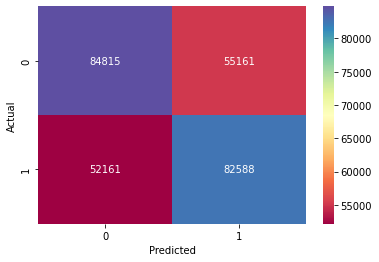

In [ ]:
get_confusion_matrix(np.array(y_test_scal), ref_xgb_pred_y)

In [ ]:
print(classification_report(y_test_scal,ref_xgb_pred_y))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61    139976
           1       0.60      0.61      0.61    134749

    accuracy                           0.61    274725
   macro avg       0.61      0.61      0.61    274725
weighted avg       0.61      0.61      0.61    274725



In [ ]:
log_reg_model = LogisticRegression().fit(X_train_scal, y_train)

In [ ]:
log_reg_pred_y = log_reg_model.predict(X_test_scal)

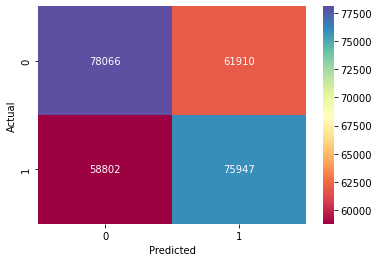

In [ ]:
get_confusion_matrix(np.array(y_test_scal), log_reg_pred_y )

In [ ]:
print(classification_report(y_test_scal, log_reg_pred_y ))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56    139976
           1       0.55      0.56      0.56    134749

    accuracy                           0.56    274725
   macro avg       0.56      0.56      0.56    274725
weighted avg       0.56      0.56      0.56    274725



In [ ]:
rf = RandomForestClassifier().fit(X_train_scal, y_train)

In [ ]:
rf_pred_y = rf.predict(X_test_scal)

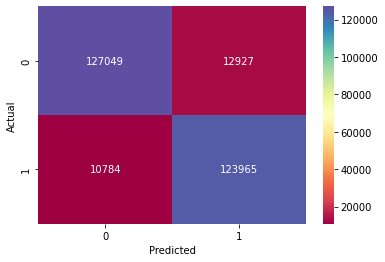

In [ ]:
get_confusion_matrix(np.array(y_test_scal), rf_pred_y )

In [ ]:
print(classification_report(y_test_scal, rf_pred_y ))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91    139976
           1       0.91      0.92      0.91    134749

    accuracy                           0.91    274725
   macro avg       0.91      0.91      0.91    274725
weighted avg       0.91      0.91      0.91    274725



**Check Point 2**

In [ ]:
model = Pipeline([  
    ('rf', RandomForestClassifier())
])

In [ ]:
def objective(trial):    
    
    rf__n_estimators = trial.suggest_int('rf__num_estimators', 300, 500) 
    rf__max_depth = trial.suggest_int('rf__max_depth', 5, 15) 
    rf__max_features = trial.suggest_categorical('rf__max_features', ["auto","sqrt","log2"])
    rf__min_samples_split = trial.suggest_int('rf__min_samples_split', 10, 30) 
    rf__min_samples_leaf = trial.suggest_int('rf__min_samples_leaf', 5, 25) 
    rf__criterion = trial.suggest_categorical('rf__criterion', ['entropy','gini'])

    params = {
        'rf__n_estimators': rf__n_estimators,
        'rf__max_depth': rf__max_depth,
        'rf__criterion':rf__criterion,
        'rf__max_features': rf__max_features,
        'rf__min_samples_split': rf__min_samples_split,
        'rf__min_samples_leaf': rf__min_samples_leaf,

    }
    
    model.set_params(**params)

    return cross_val_score(model,X_train,y_train,scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study1 = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study1.optimize(objective, n_trials=100,show_progress_bar=True)

[I 2022-11-25 13:19:12,481] A new study created in memory with name: no-name-5038ad85-7db9-4245-b7ea-2d58ea263ad7


  0%|          | 0/100 [00:00<?, ?it/s]

[W 2022-11-25 13:24:25,031] Trial 0 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-12-3fc9ec4348d1>", line 22, in objective
    return cross_val_score(model,X_train,y_train,scoring='f1', n_jobs=-1, cv=3).mean()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 520, in cross_val_score
    error_score=error_score,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 283, in cross_validate
    for train, test in cv.split(X, y, groups)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1098, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/usr/local/lib

KeyboardInterrupt: ignored

In [ ]:
def objective(trial):
          
    # -- Tune estimator algorithm
    n_neighbors = trial.suggest_int("n_neighbors", 1, 30)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
    metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
        
    # -- Cross-validate the features reduced by dimensionality reduction methods
    return cross_val_score(knn, X_train, y_train, scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study1 = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study1.optimize(objective, n_trials=100,show_progress_bar=True)

[I 2022-11-25 13:24:35,567] A new study created in memory with name: no-name-db403b15-bd37-4e47-a315-241a6a326d7d


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-11-25 13:41:37,830] Trial 0 finished with value: 0.6015871694716213 and parameters: {'rf__num_estimators': 439, 'rf__max_depth': 8, 'rf__max_features': 'log2', 'rf__min_samples_split': 18, 'rf__min_samples_leaf': 25, 'rf__criterion': 'entropy'}. Best is trial 0 with value: 0.6015871694716213.
[I 2022-11-25 13:56:54,255] Trial 1 finished with value: 0.6020081566123769 and parameters: {'rf__num_estimators': 378, 'rf__max_depth': 8, 'rf__max_features': 'auto', 'rf__min_samples_split': 18, 'rf__min_samples_leaf': 20, 'rf__criterion': 'entropy'}. Best is trial 1 with value: 0.6020081566123769.
[I 2022-11-25 14:17:56,163] Trial 2 finished with value: 0.6190630431569267 and parameters: {'rf__num_estimators': 406, 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 22, 'rf__min_samples_leaf': 20, 'rf__criterion': 'gini'}. Best is trial 2 with value: 0.6190630431569267.
[I 2022-11-25 14:32:58,133] Trial 3 finished with value: 0.6030006253399046 and parameters: {'rf

In [ ]:
optuna.visualization.plot_optimization_history(study1)

In [ ]:
optuna.visualization.plot_slice(study1)

In [ ]:
def objective(trial):
          
    # -- Tune estimator algorithm
    n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
    weights = trial.suggest_categorical("weights", ['uniform'])
    metric = trial.suggest_categorical("metric", ['manhattan'])
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, 
                               weights=weights, 
                               metric=metric)
    
    # -- Cross-validate the features reduced by dimensionality reduction methods
    return cross_val_score(knn, X_test, y_test, scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study_test = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study_test.optimize(objective, n_trials=100,show_progress_bar=True)

[I 2022-11-25 12:55:46,810] A new study created in memory with name: no-name-6f1ade72-ae1c-4bcc-ac8f-4c32996f4978


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-11-25 12:56:03,630] Trial 0 finished with value: 0.7434530181699267 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.7434530181699267.
[I 2022-11-25 12:56:16,496] Trial 1 finished with value: 0.7512117053608548 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7512117053608548.
[I 2022-11-25 12:56:29,424] Trial 2 finished with value: 0.7512117053608548 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7512117053608548.
[I 2022-11-25 12:56:44,974] Trial 3 finished with value: 0.7198925075593987 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7512117053608548.
[I 2022-11-25 12:57:05,356] Trial 4 finished with value: 0.7232610394069171 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with va

In [ ]:
optuna.visualization.plot_optimization_history(study_test)

In [ ]:
optuna.visualization.plot_slice(study_test)

In [ ]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    #optuna_model.fit(X_train, y_train)

    # Make predictions
    #y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    #accuracy = accuracy_score(y_test, y_pred)
    return cross_val_score(optuna_model, X_train, y_train, scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study1 = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study1.optimize(objective, n_trials=100,show_progress_bar=True)

In [ ]:
def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [100]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 5, 30, step=3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100, step=5),
        "max_bin": trial.suggest_int("max_bin", 10, 30),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
        "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
  model = lgbm.LGBMClassifier(objective="binary", **param_grid)
  return cross_val_score(model, X_train, y_train, scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study3 = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study3.optimize(objective, n_trials=100,show_progress_bar=True)

In [ ]:
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 1, 100),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    return cross_val_score(model, X_train, y_train, scoring='f1', n_jobs=-1, cv=3).mean()

In [ ]:
study4 = optuna.create_study(direction='maximize',sampler=TPESampler(seed=123))
study4.optimize(objective, n_trials=100,show_progress_bar=True)

NameError: ignored